In [574]:
import pandas as pd
import numpy as np

In [575]:
import math
def calculateProbability(x, cov_matrix, means, d):
    det = np.linalg.det(cov_matrix)
    inverse = np.linalg.inv(cov_matrix)
    a = x - means
    k = np.dot(np.transpose(a),inverse)
    expoent = math.exp((-1/2)*np.dot(k,a))
    return expoent/((2*math.pi)**(d/2) * math.sqrt(abs(det)))

In [576]:
import collections 
def pre_prob(y,n):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(n)
    for i in range(0, n):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

In [577]:
import operator
def max_probability(X,Y,cov_matrices,means,nattr,classes):
    probabilities = {}
    pre_probab = pre_prob(Y,classes)
    for i in range(classes):
        prob = calculateProbability(X, cov_matrices[i],means[i],nattr)
        probabilities[i] =  prob*pre_probab[i]    
    return [max(probabilities.items(), key=operator.itemgetter(1))[0],max(probabilities.items(), key=operator.itemgetter(1))[1]]

In [578]:
def predict_with_reject_option(X,Y,cov_matrices,means,nattr,classes,wr,max_prob):
    probabilities = 0
    pre_probab = pre_prob(Y,classes)
    for i in range(classes):
        prob = calculateProbability(X, cov_matrices[i],means[i],nattr)*pre_probab[i]
        probabilities +=  prob    
    prob_total = max_prob[1]/probabilities 
    if prob_total >= 1 - wr:
        return max_prob[0] 
    else: 
        return None

In [579]:
def getAccuracy(testSet, predictions):
    correct = 0
    reject = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
        if predictions[x] == None:
            reject +=1
    return [(correct/float(len(testSet))) * 100.0,(reject/float(len(testSet))) * 100.0]

# Iris Dataset

In [532]:
iris = pd.read_csv('iris.data.txt',names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [533]:
iris_copy = iris.copy()
train = iris_copy.sample(frac=0.80, random_state=2)
test = iris_copy.drop(train.index)

In [534]:
setosa = train[train['class'] == 0]
versi_virg = train[(train['class'] == 1) | (train['class'] == 2)] 

In [535]:
mean_setosa = np.array(setosa.iloc[0:,:4].mean())
mean_versi_virg = np.array(versi_virg.iloc[0:,:4].mean())

In [536]:
cov_matrix_setosa = np.cov(np.transpose(setosa.iloc[0:,:4]))
cov_matrix_versi_virg = np.cov(np.transpose(versi_virg.iloc[0:,:4]))

In [537]:
cov_matrices = [cov_matrix_setosa,cov_matrix_versi_virg]
means = [mean_setosa,mean_versi_virg]

In [538]:
test['class'] = test['class'].apply(lambda x: 1 if x == 1 or x == 2 else 0)

In [539]:
predictions = []
for i in test.iloc[0:,:4].values:
    d = max_probability(i,train['class'].values,cov_matrices,means,4,2)
    p = predict_with_reject_option(i,train['class'].values,cov_matrices,means,4,2,0.48,d)
    predictions.append(p)

In [540]:
getAccuracy(test.values, predictions)

[100.0, 0.0]

In [541]:
accuracies = []
#realizações
for i in range(20):
    iris_copy = iris.copy()
    train = iris_copy.sample(frac=0.80, random_state=i)
    test = iris_copy.drop(train.index)
    #separando classes
    setosa = train[train['class'] == 0]
    versi_virg = train[(train['class'] == 1) | (train['class'] == 2)] 
    #separando médias por classe
    mean_setosa = np.array(setosa.iloc[0:,:4].mean())
    mean_versi_virg = np.array(versi_virg.iloc[0:,:4].mean())
    #separando matrizes de covariancia por classe
    cov_matrix_setosa = np.cov(np.transpose(setosa.iloc[0:,:4]))
    cov_matrix_versi_virg = np.cov(np.transpose(versi_virg.iloc[0:,:4]))
    #array de matrizes de covariancias
    cov_matrices = [cov_matrix_setosa,cov_matrix_versi_virg]
    #array de medias
    means = [mean_setosa,mean_versi_virg]
    predictions = []
    test['class'] = test['class'].apply(lambda x: 1 if x == 1 or x == 2 else 0)
    for i in test.iloc[0:,:4].values:
        d = max_probability(i,train['class'].values,cov_matrices,means,4,2)
        p = predict_with_reject_option(i,train['class'].values,cov_matrices,means,4,2,0.04,d)
        predictions.append(p)
    a = getAccuracy(test.values,predictions)
    accuracies.append(a)

In [545]:
np.mean(accuracies[0])

50.0

In [546]:
accuracies[0]

[100.0, 0.0]

In [551]:
accuracies_avg = []
for i in accuracies:
    accuracies_avg.append(i[0])

In [554]:
np.mean(accuracies_avg)

100.0

In [560]:
medias = [100,100,100,100,100]
wr = [0.04,0.12,0.24,0.36,0.48]

Text(0.5, 0, 'limiar de rejeição')

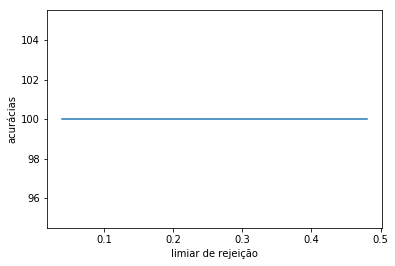

In [562]:
import matplotlib.pyplot as plt
plt.plot(wr,medias)
plt.ylabel('acurácias')
plt.xlabel('limiar de rejeição')


# Coluna Vertebral

In [580]:
from scipy.io import arff

In [581]:
data = arff.loadarff('column_3C_weka.arff')
df = pd.DataFrame(data[0])

In [582]:
df['class'] = pd.to_numeric(df['class'])

In [583]:
df_copy = df.copy()
train = df_copy.sample(frac=0.80, random_state=5)
test = df_copy.drop(train.index)

In [584]:
hern_espo = train[(train['class'] == 1) | (train['class'] == 0)]
normal = train[train['class'] == 2]

In [585]:
mean_normal = np.array(normal.iloc[0:,:6].mean())
mean_hern_espo = np.array(hern_espo.iloc[0:,:6].mean())

In [586]:
cov_matrix_normal = np.cov(np.transpose(normal.iloc[0:,:6]))
cov_matrix_hern_espo = np.cov(np.transpose(hern_espo.iloc[0:,:6]))

In [587]:
cov_matrices = [cov_matrix_normal,cov_matrix_hern_espo]
means = [mean_normal,mean_hern_espo]

In [588]:
test['class'] = test['class'].apply(lambda x: 1 if x == 0 or x == 1 else 0)

In [590]:
predictions = []
for i in test.iloc[0:,:6].values:
    d = max_probability(i,train['class'].values,cov_matrices,means,6,2)
    p = predict_with_reject_option(i,train['class'].values,cov_matrices,means,6,2,0.04,d)
    predictions.append(p)

In [591]:
getAccuracy(test.values, predictions)

[62.903225806451616, 35.483870967741936]

In [660]:
accuracies = []
#realizações
for i in range(20):
    df_copy = df.copy()
    train = df_copy.sample(frac=0.80, random_state=i)
    test = df_copy.drop(train.index)
    #separando classes
    hern_espo = train[(train['class'] == 1) | (train['class'] == 0)]
    normal = train[train['class'] == 2]
    #separando médias por classe
    mean_normal = np.array(normal.iloc[0:,:6].mean())
    mean_hern_espo = np.array(hern_espo.iloc[0:,:6].mean())
    #separando matrizes de covariancia por classe
    cov_matrix_normal = np.cov(np.transpose(normal.iloc[0:,:6]))
    cov_matrix_hern_espo = np.cov(np.transpose(hern_espo.iloc[0:,:6]))
    #array de matrizes de covariancias
    cov_matrices = [cov_matrix_normal,cov_matrix_hern_espo]
    #array de medias
    means = [mean_normal,mean_hern_espo]
    predictions = []
    test['class'] = test['class'].apply(lambda x: 1 if x == 0 or x == 1 else 0)
    predictions = []
    for i in test.iloc[0:,:6].values:
        d = max_probability(i,train['class'].values,cov_matrices,means,6,2)
        p = predict_with_reject_option(i,train['class'].values,cov_matrices,means,6,2,0.48,d)
        predictions.append(p)
    a = getAccuracy(test.values,predictions)
    accuracies.append(a)

In [661]:
accuracies_avg = []
for i in accuracies:
    accuracies_avg.append(i[1])

In [662]:
np.mean(accuracies_avg)

0.7258064516129031

In [657]:
np.std(accuracies_avg)

4.824576132627747

In [617]:
medias = [59.1,68.9,73.7,77.5,80.7]
wr = [0.04,0.12,0.24,0.36,0.48]

Text(0.5, 0, 'limiar de rejeição')

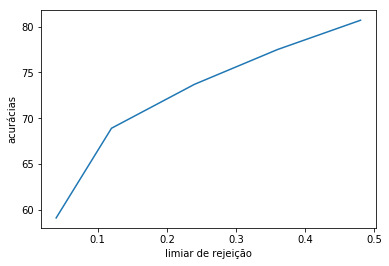

In [618]:
import matplotlib.pyplot as plt
plt.plot(wr,medias)
plt.ylabel('acurácias')
plt.xlabel('limiar de rejeição')

# Arttificial 

In [663]:
features_1 = np.array([[np.random.uniform(-0.1, 0.1), np.random.uniform(-0.1, 0.1), 0] for _ in range(50)])
features_2 = np.array([[np.random.uniform(-0.1, 0.1), np.random.uniform(0.9, 1.1), 1] for _ in range(50)])
features_3 = np.array([[np.random.uniform(0.9, 1.1), np.random.uniform(-0.1, 0.1), 2] for _ in range(50)])

In [664]:
dataset = np.concatenate([features_1, features_2, features_3], axis=0)

In [665]:
art = pd.DataFrame(dataset)

In [666]:
art_copy = art.copy()
train = art_copy.sample(frac=0.80, random_state=2)
test = art_copy.drop(train.index)

In [671]:
class_1 = train[train[2] == 0]
class_2 = train[train[2] == 1]
class_3 = train[train[2] == 1]

,0,1,2
85,0.006019,0.953472,1.0
54,-0.033481,0.925021,1.0
96,0.033802,0.900182,1.0
89,-0.081465,0.927793,1.0
77,-0.035401,0.945997,1.0
74,-0.036819,1.034883,1.0
94,-0.066177,1.019275,1.0
87,0.052931,0.938602,1.0
64,-0.085994,0.950552,1.0
84,0.059177,1.081242,1.0
